In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

!pip install -q kaggle

uploaded = files.upload()

!cp kaggle.json /root/.kaggle

!kaggle datasets download -d .....


Saving kaggle.json to kaggle (1).json
not enough values to unpack (expected 3, got 2)


#Importing face Mask Dataset

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

##### API to fetch the dataset from Kaggle

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

 data   face-mask-dataset.zip  'kaggle (1).json'   kaggle.json	 sample_data


#Importing the Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
#listdir function will create a list which contains all the files names with mask folder
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1839.jpg', 'with_mask_2988.jpg', 'with_mask_1001.jpg', 'with_mask_1986.jpg', 'with_mask_2794.jpg']
['with_mask_583.jpg', 'with_mask_993.jpg', 'with_mask_3614.jpg', 'with_mask_3715.jpg', 'with_mask_663.jpg']


In [ ]:
#listdir function will create a list which contains all the files names with mask folder
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_361.jpg', 'without_mask_803.jpg', 'without_mask_1102.jpg', 'without_mask_2076.jpg', 'without_mask_750.jpg']
['without_mask_3786.jpg', 'without_mask_3811.jpg', 'without_mask_2906.jpg', 'without_mask_2395.jpg', 'without_mask_1497.jpg']


In [ ]:
#We are going to count the no of elements in both the lists so that the dataset is balanced
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


#####Creating Labels for the two class of Images

######With Mask - 1
#####Without Mask - 0

In [ ]:
# create the labels as 1 and 0 in the form of a list

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(len(with_mask_labels))

print(without_mask_labels[0:5])
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
3725
[0, 0, 0, 0, 0]
3828


##Displaying the Images

Displaying With Mask Image

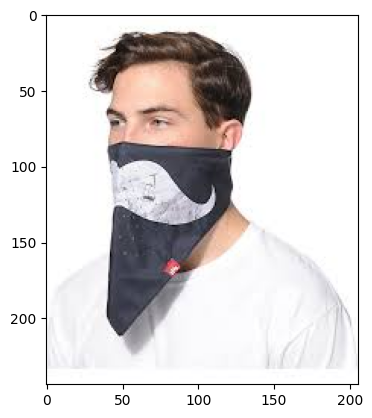

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_3119.jpg')
imgplot = plt.imshow(img)
plt.show()

Displaying Without Mask Image

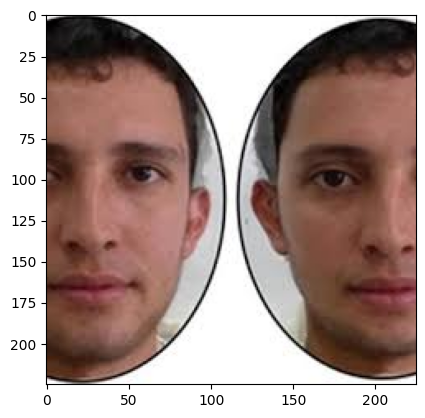

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2125.jpg')
imgplot = plt.imshow(img)
plt.show()

#Image Processing

1 Resize the Images

2 Convert the images to numpy array

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 4],
        [0, 0, 3],
        [0, 0, 3]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
print(type(data[0]))
print(data[0].shape)

<class 'numpy.ndarray'>
(128, 128, 3)


#Converting image list and label list to numpy arrays


In [ ]:
X = np.array(data)
Y = np.array(with_mask_labels + without_mask_labels)
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)


#Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#Scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 254, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [ 65,  64,  75],
        [ 49,  47,  58],
        [ 26,  24,  35]],

       [[254, 254, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [ 65,  64,  74],
        [ 53,  51,  62],
        [ 26,  24,  35]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [ 60,  59,  70],
        [ 55,  53,  64],
        [ 32,  30,  41]]

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99607843, 0.99607843, 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1

#Build a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

Compile the Neural Network

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Train the Neural Network

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 99s 577ms/step - loss: 0.5075 - acc: 0.7817 - val_loss: 0.2509 - val_acc: 0.8975
Epoch 2/5
170/170 [==============================] - 106s 627ms/step - loss: 0.3079 - acc: 0.8816 - val_loss: 0.2275 - val_acc: 0.9273
Epoch 3/5
170/170 [==============================] - 104s 615ms/step - loss: 0.2476 - acc: 0.9014 - val_loss: 0.1777 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 104s 611ms/step - loss: 0.1993 - acc: 0.9253 - val_loss: 0.1634 - val_acc: 0.9273
Epoch 5/5
170/170 [==============================] - 95s 556ms/step - loss: 0.1594 - acc: 0.9411 - val_loss: 0.1609 - val_acc: 0.9273


#Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 7s 147ms/step - loss: 0.1906 - acc: 0.9265
Test Accuracy = 0.9265387058258057


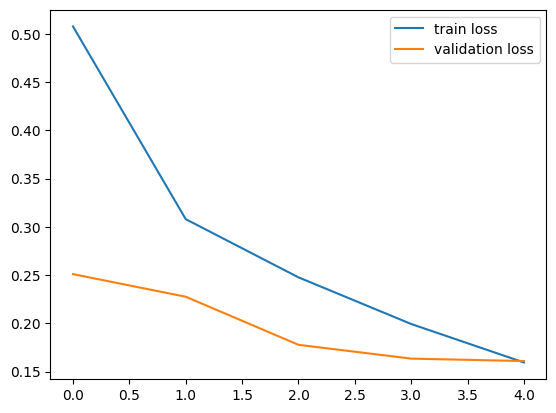

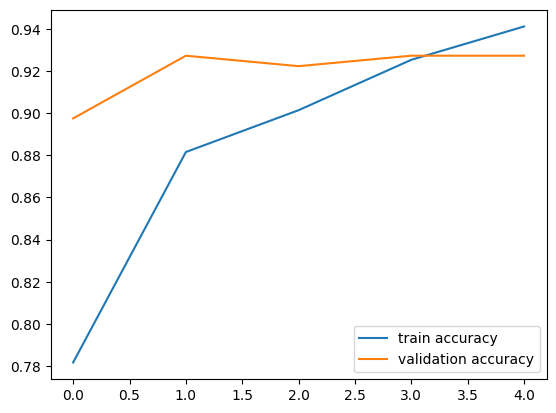

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#Predictive System

In [ ]:
def final_image(input_image_path):
  input_image_path = input('Please Enter the Path of the Image to be predicted: ')

  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (128,128))

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)

  print(input_prediction)


  input_pred_label = np.argmax(input_prediction)
  print(input_pred_label)

  if input_pred_label == 1:
    return 'The person in the image is not wearing a mask'
  return 'The person in the image is wearing a mask'

Please Enter the Path of the Image to be predicted: ./data/with_mask/with_mask_1.jpg


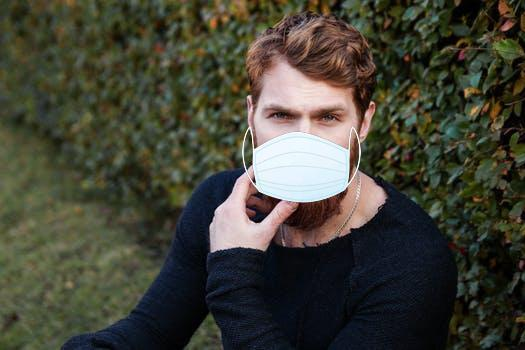

1/1 [==============================] - 0s 133ms/step
[[0.1530322  0.69287616]]
1
The person in the image is not wearing a mask


In [ ]:

print(final_image('./data/with_mask/with_mask_1.jpg'))


Please Enter the Path of the Image to be predicted: /content/data/without_mask/without_mask_1002.jpg


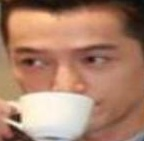

1/1 [==============================] - 0s 33ms/step
[[0.12606199 0.75511193]]
1
The person in the image is not wearing a mask


In [ ]:
print(final_image('/content/data/without_mask/without_mask_1002.jpg'))
